<a href="https://colab.research.google.com/github/sturu1/github-first/blob/master/2020_07_06_%EC%98%A4%ED%9B%84%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB dataset

첫번째 리뷰데이터: {} [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
리뷰의 최대길이: {}  2494
리뷰의 최소길이: {}  11


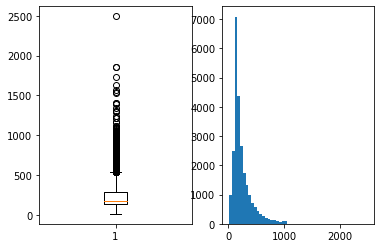

<START this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

NUM_WORDS = 10000

imdb = tf.keras.datasets.imdb
#토큰화. 정수인코딩 텍스트 전처리가 끝난 상태의 데이터를 받을 수 잇음

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = NUM_WORDS)
print("첫번째 리뷰데이터: {}", x_train[0])



len_resuit = [len(s) for s in x_train]
print("리뷰의 최대길이: {} ", format(np.max(len_resuit)))
print("리뷰의 최소길이: {} ", format(np.min(len_resuit)))

#대체적으로 1000이하의 길이를 가지며, 특히 100~500길이를 가진 데이터가 많다
#반면, 가장 긴 길이를 가진 데이터는 2000개의 단어수를 넘기도 함
plt.subplot(1, 2, 1)
plt.boxplot(len_resuit)
plt.subplot(1, 2, 2)
plt.hist(len_resuit, bins=50)
plt.show()

#Pesore the original sentence from imdb dataset

INDEX_FROM = 3
word_to_id = imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k, v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key, value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in x_train[0]))

#데이터셋의 입력정보를 맞춰 주기위해서 특정 길이를 잘라줘야함
#길이에 못미치는 문장들은 패딩처리 해줘야함
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, value = 0, padding = 'pre', maxlen=(32))
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, value = 0, padding = 'pre', maxlen=(32))

#훈련, 테스트 데이터를 텐서플로우 라이브러리 tf.data.Dataset을 활용하여 관리
#자동으로 셔플링, 배치크리로 나누어서 train_ds, test_ds에 담아둔다
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(1000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)


#------------------------------여기까지 데이터 이야기
EPOCHS = 10

class MyModel(tf.keras.Model):
  #사용할 layer 오브젝트들을 독립적으로 정의
  def __init__(self):
    super(MyModel, self).__init__()
    #길이가 10000인 one-hot 백터를 길이가 16인 feature벡터로 변경
    self.emb = tf.keras.layers.Embedding(NUM_WORDS, 64)
    self.rnn1 = tf.keras.layers.LSTM(32, input_shape=(64, 1), return_sequences = True)
    self.rnn2 = tf.keras.layers.LSTM(32, return_sequences= True)
    self.rnn3 = tf.keras.layers.LSTM(32, return_sequences= False)
    self.dense = tf.keras.layers.Dense(2, activation = 'softmax')

  #x는 입력데이터
  #정의된 오브젝트들 같 관계를 만들어줌
  def call(self, x, training=None, mask = None):
    x = self.emb(x)
    x = self.rnn1(x)
    x = self.rnn2(x)
    x = self.rnn3(x)
    x = self.dense(x)
    return x

def train_step(model, inputs, labels, loss_object, optimizer, train_loss, train_accuracy):
  #그래디언트 (미분 값)가 기록됨 #labels(정답)
  with tf.GradientTape() as tape:
    predictions = model(inputs, training = True)
    loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)

    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)

def test_step(model, inputs, labels, loss_object, test_loss, test_accuracy):
  predictions = model(inputs, training = False)
  t_loss = loss_object(labels, predictions)
  test_loss(t_loss)
  test_accuracy(labels, predictions)

#=================== 모델, 학습모듈이 정의되었음

#커스텀된 모델 인스천스 생성
model = MyModel()
#loss_fuction 생성
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
#최적화 함수 받아오기
optimizer = tf.keras.optimizers.Adam()

#성능 측정방법 정의
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

#=================학습에 필요한 준비물 완료
#이제 학습 루틴
EPOCHS = 10

for epoch in range(EPOCHS):
  #훈련데이터 가져와서 학습
  for seqs, labels in train_ds:
    train_step(model, seqs, labels, loss_object, optimizer, train_loss, train_accuracy)

  #테스트데이터 가져와서 테스트 및 정확도 측정
  for seqs, labels in test_ds:
    test_step(model, seqs, labels, loss_object, train_loss, train_accuracy)

  templete = 'epoch {}, loss: {}, acc: {}, test_loss: {}, test_acc: {}'
  print(templete.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result(),
                        train_loss.result(),
                        test_accuracy.result()
                        ))

train_loss.reset_states()
train_accuracy.reset_states()
train_loss.reset_states()
test_accuracy.reset_states()